# Africa’s Billionaires - 2022 RANKING

https://www.forbes.com/africa-billionaires/list/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2022

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'africa-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []
age = []
gender = []
worth = []
industry = []

for i in range(18):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  age.append(r.json()[i]['age'])
  gender.append(r.json()[i]['gender'])
  worth.append(r.json()[i]['worth'])
  industry.append(r.json()[i]['industry'])

# Create Dataframe

In [5]:
data = {
  'Rank': rank,
  'Name': name,
  'Age': age,
  'Gender': gender,
  'NetWorth': worth,
  'Industry': industry
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df.head()

,Rank,Name,Age,Gender,NetWorth,Industry
0,1,Aliko Dangote,65,M,13900.0,Manufacturing
1,2,Johann Rupert,72,M,11000.0,Fashion & Retail
2,3,Nicky Oppenheimer,77,M,8700.0,Metals & Mining
3,4,Nassef Sawiris,61,M,8600.0,Construction & Engineering
4,5,Abdulsamad Rabiu,61,M,7000.0,Diversified


In [7]:
df.tail()

,Rank,Name,Age,Gender,NetWorth,Industry
13,14,Michiel Le Roux,73,M,1700.0,Finance & Investments
14,15,Othman Benjelloun,89,M,1500.0,Finance & Investments
15,15,Mohammed Dewji,47,M,1500.0,Diversified
16,15,Youssef Mansour,77,M,1500.0,Diversified
17,18,Yasseen Mansour,60,M,1100.0,Diversified


In [8]:
df.shape

(18, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      18 non-null     int64  
 1   Name      18 non-null     object 
 2   Age       18 non-null     int64  
 3   Gender    18 non-null     object 
 4   NetWorth  18 non-null     float64
 5   Industry  18 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 992.0+ bytes


In [10]:
df['Rank'] = df['Rank'].astype('category')                      # change Rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 18], ordered=False)

In [11]:
df.describe(include='object')

,Name,Gender,Industry
count,18,18,18
unique,18,1,9
top,Aliko Dangote,M,Diversified
freq,1,18,7


In [12]:
df['Gender'].value_counts()

M    18
Name: Gender, dtype: int64

In [13]:
df['Industry'].value_counts()[:20]                        # select top 20

Diversified                   7
Metals & Mining               2
Telecom                       2
Finance & Investments         2
Manufacturing                 1
Fashion & Retail              1
Construction & Engineering    1
Food & Beverage               1
Media & Entertainment         1
Name: Industry, dtype: int64

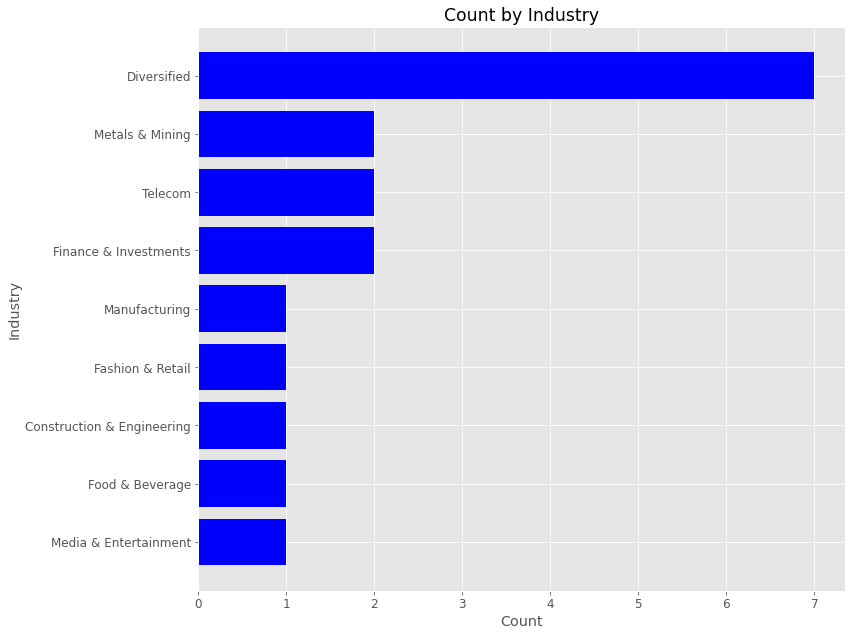

In [14]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Industry'].value_counts().keys(), width=df['Industry'].value_counts()[:20].values, color='blue', align='center')
ax.set(title='Count by Industry', xlabel='Count', ylabel='Industry')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [15]:
round(df.describe())

,Age,NetWorth
count,18.0,18.0
mean,68.0,4717.0
std,10.0,3765.0
min,47.0,1100.0
25%,61.0,1825.0
50%,68.0,2900.0
75%,74.0,6925.0
max,89.0,13900.0


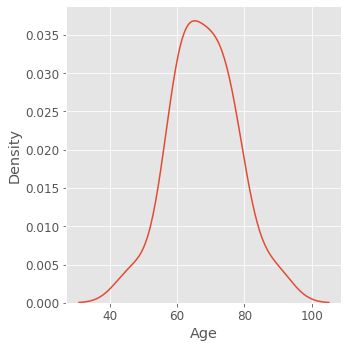

In [16]:
sns.displot(df, x='Age', kind='kde')

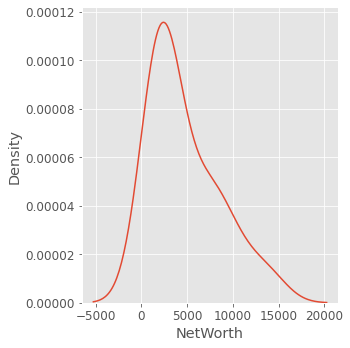

In [17]:
sns.displot(df, x='NetWorth', kind='kde')

In [18]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

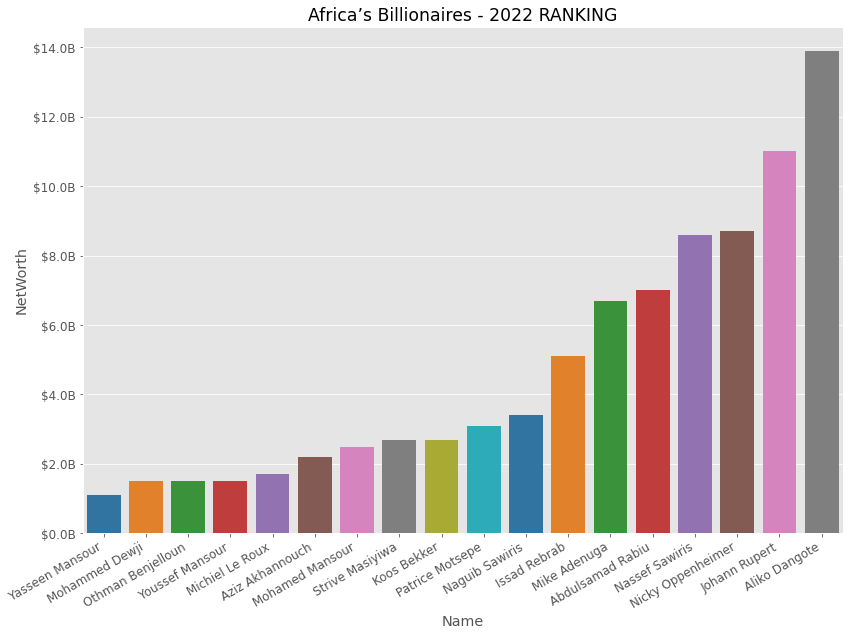

In [19]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

sns.barplot(
  data=df.sort_values(by='NetWorth'),
  x='Name', y='NetWorth',
  palette='tab10'
)

ax.set(title='Africa’s Billionaires - 2022 RANKING', xlabel='Name', ylabel='NetWorth')

ax.yaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [20]:
df.groupby('Industry')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=False)

,Age,NetWorth
Industry,,
Diversified,449,22500.0
Manufacturing,65,13900.0
Metals & Mining,137,11800.0
Fashion & Retail,72,11000.0
Construction & Engineering,61,8600.0
Telecom,129,6100.0
Food & Beverage,78,5100.0
Finance & Investments,162,3200.0
Media & Entertainment,69,2700.0


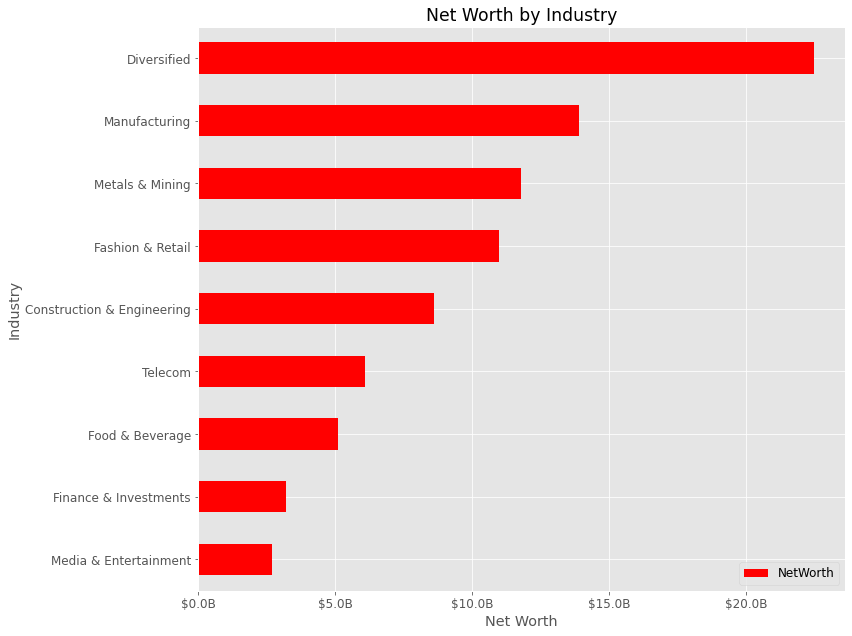

In [21]:
ax = df.drop(columns=['Age']).groupby('Industry')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=True)\
  .plot(kind='barh', color='red')

ax.set(title='Net Worth by Industry', xlabel='Net Worth', ylabel='Industry')
ax.xaxis.set_major_formatter(format_bill)